In [1]:
import numpy as np 
import cv2
import pywt
import matplotlib
from matplotlib import pyplot as plt 
from PIL import Image
%matplotlib inline

In [2]:
img=cv2.imread('F:/Classification project/Model/test_image/trump.jpg')
img.shape

(834, 1200, 3)

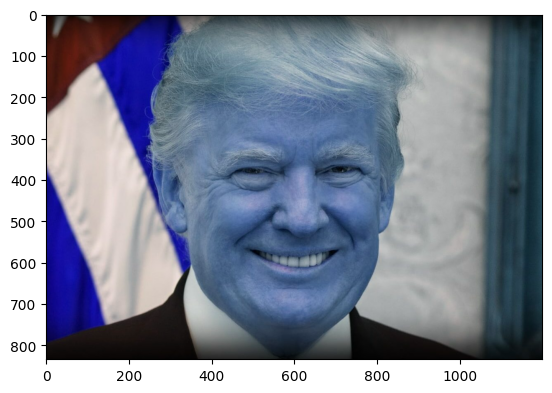

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray.shape

(834, 1200)

In [5]:
gray

array([[13, 13, 12, ..., 17, 17, 17],
       [13, 13, 13, ..., 17, 17, 17],
       [13, 13, 13, ..., 17, 18, 18],
       ...,
       [ 8,  8,  8, ...,  9,  9,  9],
       [ 7,  7,  7, ...,  8,  8,  8],
       [ 7,  7,  7, ...,  8,  8,  8]], dtype=uint8)

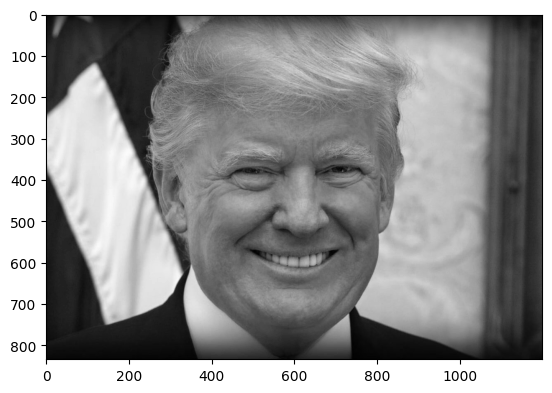

In [6]:
plt.imshow (gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('F:/Classification project/Model/openCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('F:/Classification project/Model/openCV/haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray,1.2,5)
faces

array([[334, 167, 563, 563]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h 

(334, 167, 563, 563)

Error in callback <function _draw_all_if_interactive at 0x0000016257AE9C60> (for post_execute):


KeyboardInterrupt: 

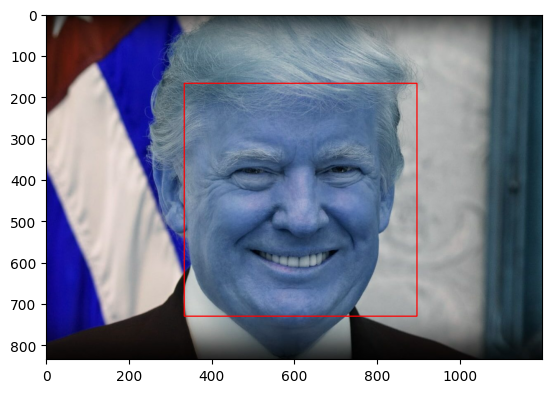

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

roi=Region of Interest


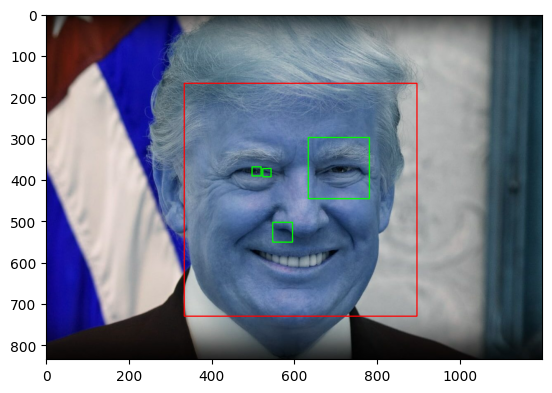

In [ ]:
cv2.destroyAllWindows()
#faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

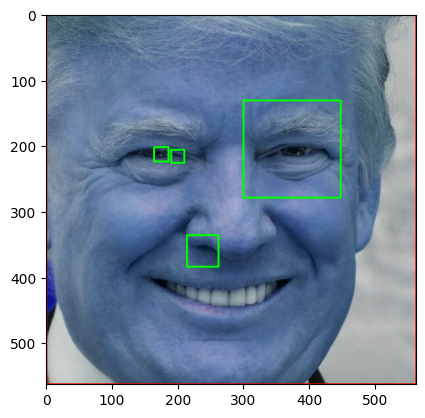

In [ ]:

%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.1,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes= eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>= 2:
            return roi_color

In [ ]:
print (img.shape)

(834, 1200, 3)


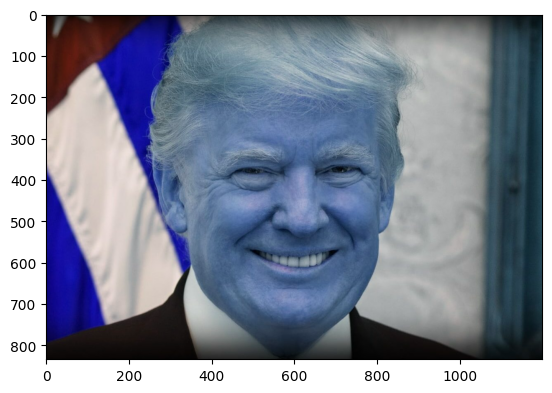

In [ ]:
original_image=cv2.imread('F:/Classification project/Model/test_image/trump.jpg',cv2.IMREAD_UNCHANGED)
plt.imshow(original_image)

In [ ]:
img = img.astype(np.float32)

used pillow function


<function matplotlib.pyplot.show(close=None, block=None)>

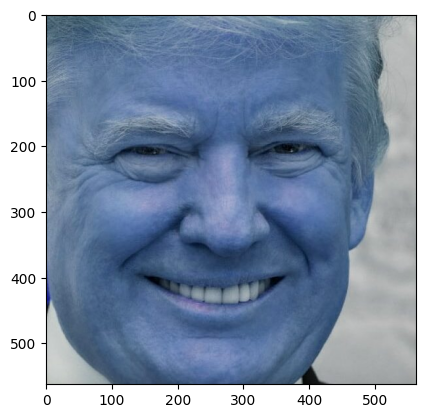

In [ ]:
pil_image= get_cropped_image_if_2_eyes('F:/Classification project/Model/test_image/trump.jpg')
cropped_image = np.array(pil_image)
plt.imshow(cropped_image)
plt.show

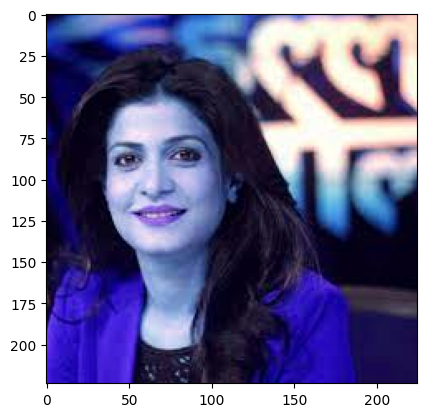

In [ ]:
sec_img=cv2.imread('F:/Classification project/Model/test_image/download (9).jpeg')
plt.imshow(sec_img)

<function matplotlib.pyplot.show(close=None, block=None)>

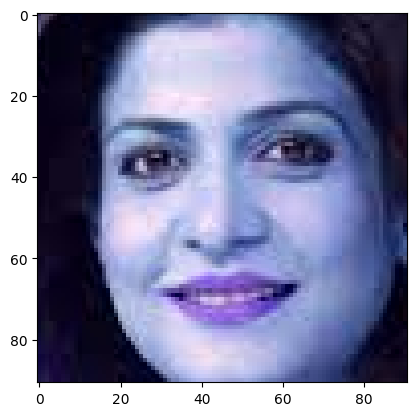

In [ ]:
pil_image= get_cropped_image_if_2_eyes('F:/Classification project/Model/test_image/download (9).jpeg')
cropped_image = np.array(pil_image)
plt.imshow(cropped_image)
plt.show

In [ ]:
path_to_data= "F:/Classification project/Model/Data/"
path_to_cr_data="F:/Classification project/Model/Data/cropped/"

In [ ]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['F:/Classification project/Model/Data/Anjana OM Kashayp',
 'F:/Classification project/Model/Data/Joe Biden',
 'F:/Classification project/Model/Data/narendra modi',
 'F:/Classification project/Model/Data/virat kohli',
 'F:/Classification project/Model/Data/Vladimir putin']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs =[]
celebs_file_names_dict ={}

for img_dir in img_dirs:
    count=1
    celebs_name = img_dir.split('/')[-1]
    print(celebs_name)
    
    celebs_file_names_dict[celebs_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data+celebs_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)
                
            cropped_file_name=celebs_name + str(count) + ".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebs_file_names_dict[celebs_name].append(cropped_file_path)
            count += 1

Anjana OM Kashayp
Generating cropped images in folder: F:/Classification project/Model/Data/cropped/Anjana OM Kashayp
Joe Biden
Generating cropped images in folder: F:/Classification project/Model/Data/cropped/Joe Biden
narendra modi
Generating cropped images in folder: F:/Classification project/Model/Data/cropped/narendra modi
virat kohli
Generating cropped images in folder: F:/Classification project/Model/Data/cropped/virat kohli
Vladimir putin
Generating cropped images in folder: F:/Classification project/Model/Data/cropped/Vladimir putin


In [ ]:
img_dirs

['F:/Classification project/Model/Data/Anjana OM Kashayp',
 'F:/Classification project/Model/Data/Joe Biden',
 'F:/Classification project/Model/Data/narendra modi',
 'F:/Classification project/Model/Data/virat kohli',
 'F:/Classification project/Model/Data/Vladimir putin']

In [ ]:
print(celebs_name)

Vladimir putin


# vwavelet transformation will be performed on images it allows to extract the important features of the images.
# Fourier Transform will take a complex signal and it will return you the basic signal that makes that complex signal.

In [ ]:
celebs_file_names_dict

{'Anjana OM Kashayp': ['F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp1.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp2.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp3.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp4.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp5.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp6.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp7.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp8.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp9.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/Anjana OM Kashayp10.png',
  'F:/Classification project/Model/Data/cropped/Anjana OM Kashayp/An

In [ ]:
import numpy as np
import pywt
import cv2

def w2d (img,mode='haar',level=1):
    imArray = img 
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.color_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray/=255;
    #Compute Cofficient
    coeffs =pywt.wavedec2(imArray ,mode ,level=level)

    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H = np.unit8(imArray_H)

    return imArray_H

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


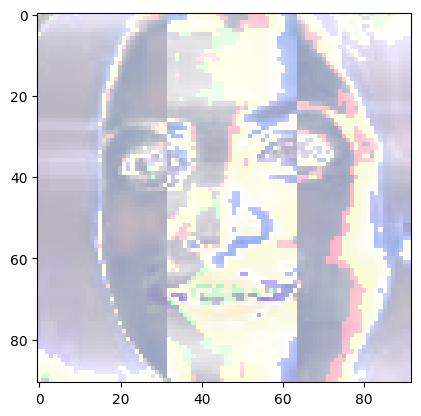

In [ ]:
im_har= w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
class_dict ={}
count=0 
for celebs_name in celebs_file_names_dict.keys():
    class_dict[celebs_name]=count
    count = count+1
print (class_dict)

{'Anjana OM Kashayp': 0, 'Joe Biden': 1, 'narendra modi': 2, 'virat kohli': 3, 'Vladimir putin': 4}


In [ ]:
x= []
y= []

for celebs_name, training_files in celebs_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har=cv2.resize(img_har,(16,16))
        # numpy has a function to vertically stack them
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_image)
        y.append(class_dict[celebs_name])

In [ ]:
len(x)

210

In [ ]:
len(x[0])

4096

In [ ]:
x[0]

array([[ 30],
       [ 21],
       [106],
       ...,
       [175],
       [174],
       [174]], dtype=uint8)

# converting x i.e list to floast type

In [ ]:
x= np.array(x).reshape(len(x),4096).astype(float)
x.shape

(210, 4096)

# Part-4 Feature Engineering done i.e data cleaning is done

# Training the Model

# we will use support vector machine with rbf kernal tuned with heuristic finetuning

In [ ]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=0)

#It is done to scale the data first, method other than standard scaler minmac scaler. In second step we are creating a svm with certain random parameters.Later these parameters will be fined using GridSearch CV.

pipe= Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf', C=10))])

#the next step will train the machine learning model with xtrain and ytrain

pipe.fit(x_train , y_train)

pipe.score(x_test,y_test)

0.7924528301886793

In [ ]:
len(x_test)

53

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.55      0.60      0.57        10
           2       0.92      0.92      0.92        12
           3       0.67      1.00      0.80         8
           4       0.50      0.17      0.25         6

    accuracy                           0.79        53
   macro avg       0.73      0.72      0.70        53
weighted avg       0.79      0.79      0.78        53



To understand the above concept google     Start from grid search cv

In [ ]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params ={
    'svm': {
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [ ]:
scores=[]
best_estimators = {}
import pandas as pd 
for algo,mp in model_params.items():
    params = {f'{algo}__{key}': value for key, value in mp['params'].items()}
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf =GridSearchCV(pipe,mp['params'],cv=5,return_train_score= False)
    clf.fit(x_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.885081,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.757258,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.878226,{'logisticregression__C': 1}


In [ ]:
best_estimators['svm'].score(x_test,y_test)

0.8490566037735849

In [ ]:
best_estimators['random_forest'].score(x_test,y_test)

0.7358490566037735

In [ ]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9056603773584906

In [ ]:
best_clf= best_estimators['logistic_regression']

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test ,best_clf.predict(x_test))
cm

array([[15,  0,  0,  0,  2],
       [ 0,  8,  1,  1,  0],
       [ 0,  0, 11,  1,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

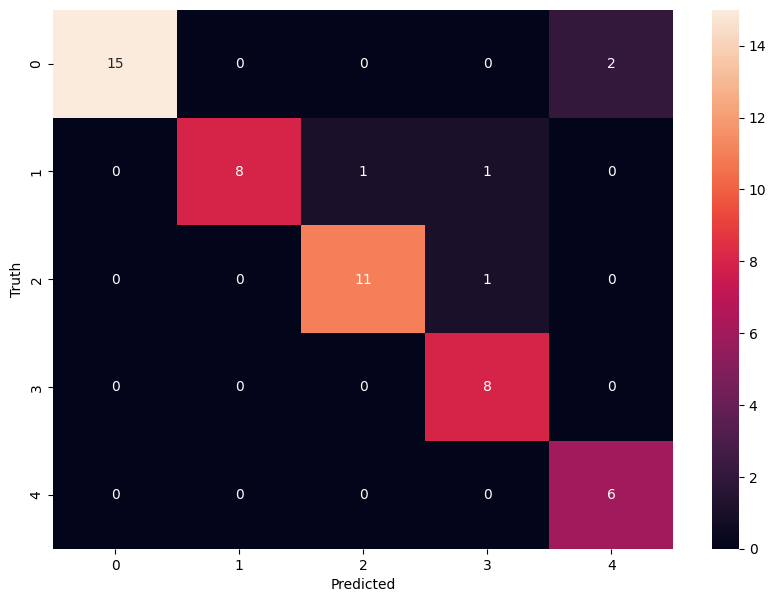

In [ ]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Anjana OM Kashayp': 0,
 'Joe Biden': 1,
 'narendra modi': 2,
 'virat kohli': 3,
 'Vladimir putin': 4}

Save the trained model


In [ ]:
import joblib 
#save the model in pickle format
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

Save class dictionary

In [ ]:
import json
with open ("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))